In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

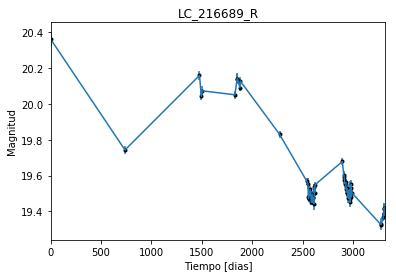

In [2]:
data = np.genfromtxt('LC_216689_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_216689_R')
plt.savefig("LC_216689_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

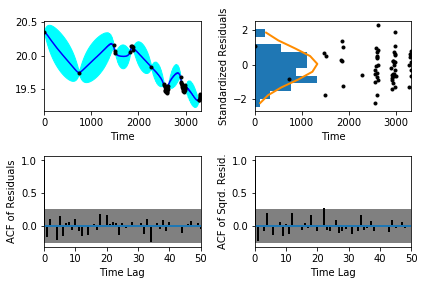

In [5]:
sample.assess_fit()

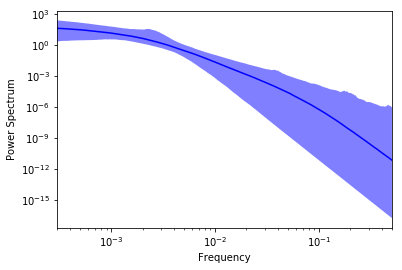

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

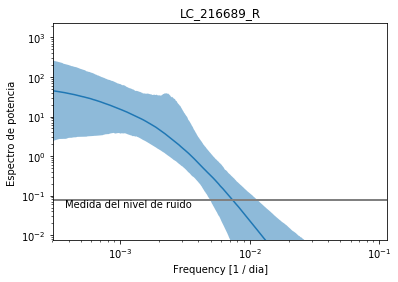

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_216689_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_216689_R')

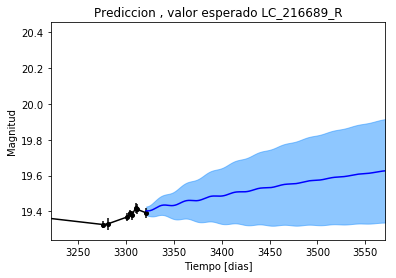

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_216689_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_216689_R')

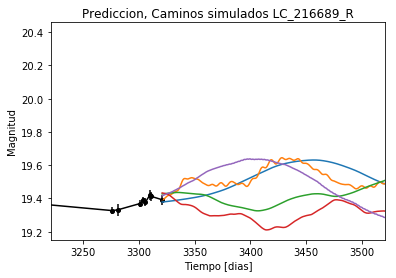

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_216689_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


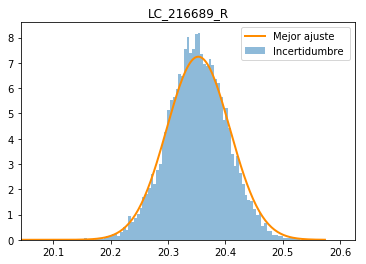

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_216689_R')
plt.savefig("Mejor_ajuste_LC_216689_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_216689_R')

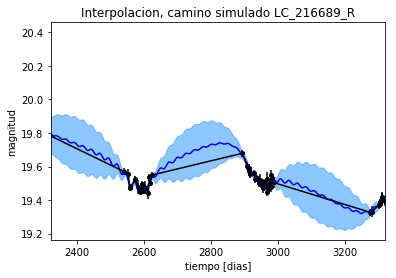

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_216689_R')

Text(0.5,1,'Interpolacion, camino simulado  LC_216689_R')

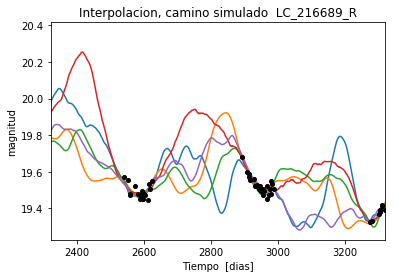

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_216689_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 674.04544361
Median: 0.00915550068519
Standard deviation: 0.193998918118
68% credibility interval: [ 0.00075724  0.19634742]
95% credibility interval: [  3.45717546e-04   7.57838856e-01]
99% credibility interval: [  3.07503618e-04   9.47059420e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 325.197065073
Median: 0.00158726627642
Standard deviation: 0.0726185675679
68% credibility interval: [ 0.00046335  0.0167482 ]
95% credibility interval: [ 0.00031694  0.19958092]
99% credibility interval: [  3.05311522e-04   5.46495291e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 471.428499076
Median: 0.0141015301428
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1083.15438626
Median: 119.527432297
Standard deviation: 1.75250599992
68% credibility interval: [ 117.64502288  120.79602211]
95% credibility interval: [ 115.05513941  121.82399266]
99% credibility interval: [ 112.98366067  123.0009253 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 845.67826473
Median: 0.579320082999
Standard deviation: 1.96165437837
68% credibility interval: [ 0.04633703  3.55469154]
95% credibility interval: [ 0.01647419  6.58148293]
99% credibility interval: [ 0.01047661  8.83703372]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 549.063051049
Median: 0.309149001398
Standard deviation: 7.4744663477
68% credibility interval: [ 0.01234785  5.44723529]
95% credibility interval: [  6.65583286e-04 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18109.8988593
Median: 1.92402860542e-19
Standard deviation: 4.32143587782e+56
68% credibility interval: [  1.63618640e-59   5.58879704e-04]
95% credibility interval: [  3.56044112e-95   1.47590155e+30]
99% credibility interval: [  3.12187454e-102   3.36383763e+050]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2087.31466728
Median: 19.8444040082
Standard deviation: 0.160975234754
68% credibility interval: [ 19.71666767  19.98746213]
95% credibility interval: [ 19.54933943  20.17949325]
99% credibility interval: [ 19.3726693   20.40517136]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 270.473437436
Median: 0.00283174895207
Standard deviation: 0.223181008979
68% credibility interval: [ 0.          0.23747213]
95% credibility interval: [ 0.          0.83416296]
99% credibility interval: [ 0.          0.97192015]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 270.473437436
Median: 0.00283174895207
Standard deviation: 0.223181008979
68% credibility interval: [ 0.          0.23747213]
95% credibility interval: [ 0.          0.83416296]
99% credibility interval: [ 0.          0.97192015]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1209.96517197
Median: 0.0
Standard deviation: 0.000636491334675
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1083.15438626
Median: 119.527432297
Standard deviation: 1.75250599992
68% credibility interval: [ 117.64502288  120.79602211]
95% credibility interval: [ 115.05513941  121.82399266]
99% credibility interval: [ 112.98366067  123.0009253 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1941.65989222
Median: 0.108443177677
Standard deviation: 0.123709529203
68% credibility interval: [ 0.06834521  0.19893056]
95% credibility interval: [ 0.04436811  0.42895288]
99% credibility interval: [ 0.03605479  0.74907521]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1071.52105501
Median: 1.04875054473
Standard deviation: 0.176255683816
68% credibility interval: [ 0.89960985  1.24150518]
95% credibility interval: [ 0.77224742  1.45391137]
99% credibility interval: [ 0.69225432  1.60907921]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 324.894196863
Median: 0.000200564763031
Standard deviation: 0.0135215554932
68% credibility interval: [  3.53470207e-06   5.18092831e-03]
95% credibility interval: [  1.49742794e-35   3.06115386e-02]
99% credibility interval: [  2.79126313e-54   9.52457326e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 674.04544361
Median: (-0.0575257073851-0.0305862448388j)
Standard deviation: 1.85801070193
68% credibility interval: [-1.23368720+0.j         -0.00475785-0.27499233j]
95% credibility interval: [ -4.76164197e+00+0.j          -2.17220740e-03-0.01533111j]
99% credibility interval: [ -5.95054983e+00-6.09964526j  -1.93210221e-03-0.25042007j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 325.197065073
Median: (-0.0099730881466+0.0223621529029j)
Standard deviation: 1.47465193439
68% credibility interval: [-0.10523206+0.j         -0.00291131+0.00106485j]
95% credibility interval: [-1.25400393+0.01169009j -0.00199141+0.j        ]
99% credibility interval: [ -3.43373118e+00+3.05831492j  -1.91832887e-03+0.0081906j ]
Posterior s